In [1]:
from langchain.vectorstores import Chroma
from langchain.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain.chains import VectorDBQA
from sentence_transformers import SentenceTransformer
import pandas as pd

/Volumes/External/opt/anaconda3/envs/ollama2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import umap

In [3]:
%cd /Volumes/External/source/GTPracticum/data 
%ls -salh

/Volumes/External/source/GTPracticum/data
total 13166584
      0 drwxr-xr-x   26 kariato  staff   832B Mar 17 23:23 ./
      0 drwxr-xr-x    8 kariato  staff   256B Mar 15 14:14 ../
     16 -rw-r--r--@   1 kariato  staff   6.0K Mar 17 23:34 .DS_Store
  27280 -rw-r--r--@   1 kariato  staff    13M Feb 21 00:04 2023-10-eb-big-book-of-mlops-2nd-edition-v2-102723-final (1).pdf
  27280 -rw-r--r--@   1 kariato  staff    13M Feb 20 10:15 2023-10-eb-big-book-of-mlops-2nd-edition-v2-102723-final.pdf
    464 -rw-r--r--@   1 kariato  staff   232K Feb 10 16:00 9deec473-6ab3-4c90-a2ec-86ae93b0a6e6.pdf
   1472 -rw-r--r--@   1 kariato  staff   730K Mar 16 22:20 W-2_Form_2023_Davey_2024_01_05_13_13_13_-0800_W-2_ESS (1).pdf
   1472 -rw-r--r--@   1 kariato  staff   730K Mar 16 22:15 W-2_Form_2023_Davey_2024_01_05_13_13_13_-0800_W-2_ESS.pdf
   6152 -rw-r--r--@   1 kariato  staff   2.1M Mar 17 23:46 alltopics.csv
 733000 -rw-r--r--@   1 kariato  staff   358M Feb 10 14:56 archive (1).zip
      0 drwxr-xr-x 

/Volumes/External/opt/anaconda3/envs/ollama2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
import re
def cleanText(text):
        
    text = text.replace('\\n','')
    text = text.replace('\\','')
    text = re.sub(' +', ' ', text)
    text = text.replace('\t', '')
    text = text.replace('\n', '')
    return text

In [5]:
from collections import defaultdict
topics={}
dates=defaultdict(list)
alltopics=[]

In [6]:
embedding_function2 = SentenceTransformerEmbeddings(model_name="all-mpnet-base-v2")
db2 = Chroma(embedding_function=embedding_function2,persist_directory="./chroma2_db")

/Volumes/External/opt/anaconda3/envs/ollama2/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [7]:
query = "mark to market accounting offsetting concerns hiding losses"
docs = db2.similarity_search_with_score(query,k=1000)
for doc in docs:
    details = cleanText(doc[0].page_content)
    if details not in topics:
        dates['market'].append(doc[0].metadata['DATE'])
        topics[details]='red'
        alltopics.append({'topic':'market','date':doc[0].metadata['DATE'],'details':details})

#topics

In [24]:
query = "loses in the Raptor SBE"
docs = db2.similarity_search_with_score(query,k=1000)
for doc in docs:
    details = cleanText(doc[0].page_content)
    if details not in topics:
        dates['raptor'].append(doc[0].metadata['DATE'])
        topics[details]='orange'
        alltopics.append({'topic':'raptor','date':doc[0].metadata['DATE'],'details':details})

#topics

In [9]:
query = "remove records"
docs = db2.similarity_search_with_score(query,k=100)
for doc in docs:
    details = cleanText(doc[0].page_content)
    if details not in topics:
        dates['records'].append(doc[0].metadata['DATE'])
        topics[details]='green'
        alltopics.append({'topic':'records','date':doc[0].metadata['DATE'],'details':details})

#topics

In [10]:
query = "illegal accounting practices"
docs = db2.similarity_search_with_score(query,k=1000)
for doc in docs:
    details = cleanText(doc[0].page_content)
    if details not in topics:
        dates['accounting'].append(doc[0].metadata['DATE'])
        topics[details]='blue'
        alltopics.append({'topic':'accounting','date':doc[0].metadata['DATE'],'details':details})

#topics

In [11]:
query = "lets meet tomorrow"
docs = db2.similarity_search_with_score(query,k=400)
for doc in docs:
    details = cleanText(doc[0].page_content)
    if details not in topics:
        dates['meeting'].append(doc[0].metadata['DATE'])
        topics[details]='yellow'
        #alltopics.append({'topic':'meet','date':doc[0].metadata['DATE'],'details':details})

#topics

In [12]:
colormap = {'market':'red','raptor':'orange','records':'green','accounting':'blue','meeting':'yellow'}

In [13]:
enron_df=pd.read_csv('enron_processed.csv')

In [14]:
print(enron_df.shape)
enron_df.drop_duplicates(subset='body_short',inplace=True) 
print(enron_df.shape)


(517401, 15)
(246415, 15)


In [15]:

enron_df=enron_df[enron_df['body_short'].str.len()>30]
enron_sampple_df= enron_df.sample(2000)
enron_data=enron_sampple_df['body_short'].tolist()

In [16]:
#dates['sample']=enron_sampple_df["DATE"].tolist()

In [17]:


for doc in enron_data:
    details = cleanText(doc)
    if details not in topics:
        topics[details]='grey'
#topics

In [18]:
import matplotlib.dates as mdates
alltopics_df=pd.DataFrame(alltopics)
alltopics_df['color'] = alltopics_df['topic'].map(colormap)
alltopics_df['dates']=alltopics_df['date'].apply(lambda x:mdates.datestr2num(x.split('>>')[0]))
alltopics_df.sort_values('dates',inplace=True)
alltopics_df.to_csv('alltopics.csv',index=False)

/var/folders/b5/q7jfctvs3wl6sly80nxcpg3h0000gn/T/ipykernel_32525/3833351256.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(datetime_dates, range(len(datetime_dates)), color=colormap[i],linestyle='dashed', marker='o')


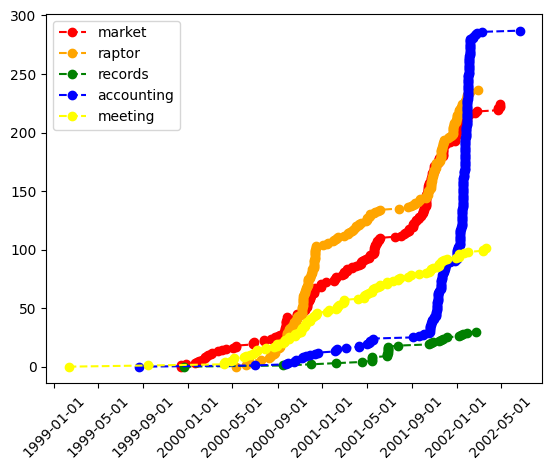

In [19]:
import matplotlib.pyplot as plt


offset=0
legend=[]
# Assuming you have a list of ASCII dates called 'ascii_dates'
# Convert ASCII dates to datetime objects
for i,j in dates.items():
    legend.append(i)
    datetime_dates = [mdates.datestr2num(date.split('>>')[0]) for date in j]
    datetime_dates=[dt for dt in datetime_dates if dt>mdates.datestr2num('Jan 1 1999')]
    datetime_dates.sort()
    offset+=1

# Plot the timeseries
    
    plt.plot_date(datetime_dates, range(len(datetime_dates)), color=colormap[i],linestyle='dashed', marker='o')

# Specify the date format on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.legend(legend)
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
#plt.yscale('log')
# Show the plot
plt.show()


In [20]:
enron_details = []
enron_colors = []
for i,j in topics.items():
    enron_details.append(i)
    enron_colors.append(j)


In [21]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

In [22]:
import numpy as np
from tqdm.auto import tqdm

batch_size = 16
n = len(enron_details)
embeds = np.zeros((n, embedding_model.get_sentence_embedding_dimension()))

for i in tqdm(range(0, n, batch_size)):
    i_end = min(i+batch_size, n)
    batch = enron_details[i:i_end]
    batch_embed = embedding_model.encode(batch)
    embeds[i:i_end,:] = batch_embed

100%|██████████| 181/181 [00:22<00:00,  8.12it/s]


  0%|          | 0/9 [00:00<?, ?it/s]/Volumes/External/opt/anaconda3/envs/ollama2/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
100%|██████████| 9/9 [00:58<00:00,  6.46s/it]


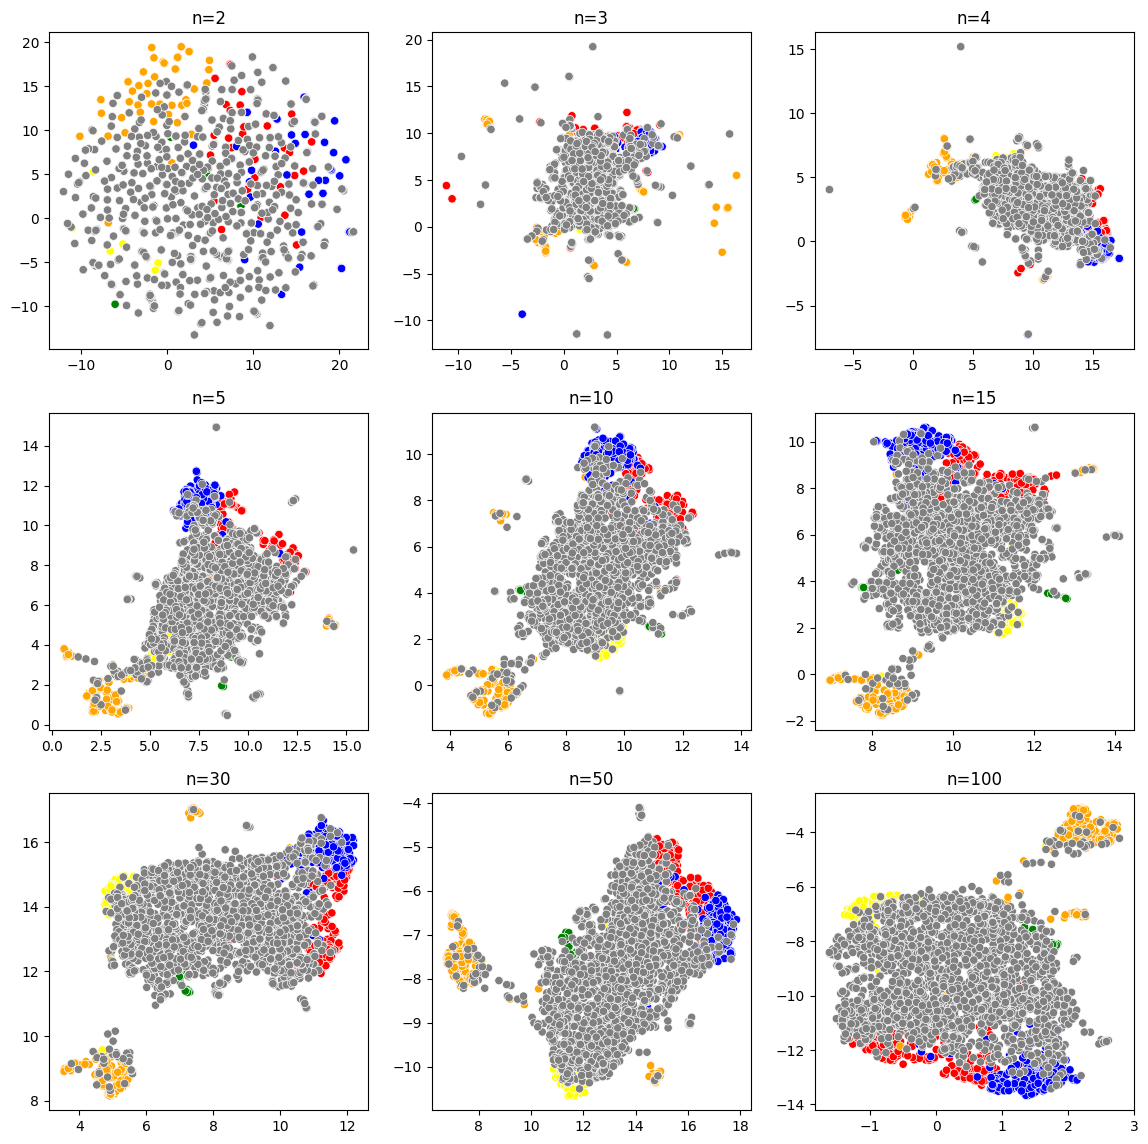

In [23]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
import matplotlib.colors as mcolors
import random
hex_colors = list(mcolors.CSS4_COLORS.keys())
random.shuffle(hex_colors)

fig, ax = plt.subplots(3, 3, figsize=(14, 14))
nns = [2, 3, 4, 5, 10, 15, 30, 50, 100]
i, j = 0, 0
for n_neighbors in tqdm(nns):
    fit = umap.UMAP(n_neighbors=n_neighbors)
    u = fit.fit_transform(embeds)
    #uColor=kmeans.fit_predict(u)
    #c=[hex_colors[i] for i in uColor]
    sns.scatterplot(x=u[:,0], y=u[:,1], c=enron_colors, ax=ax[j, i])
    ax[j, i].set_title(f'n={n_neighbors}')
    if i < 2: i += 1
    else: i = 0; j += 1